Econometría Aplicada. Lección 6
===============================

**Author:** Marcos Bujosa



<div class="abstract" id="org074a565">
<p>
En esta lección veremos algunas herramientas estadísticas.
 y usaré la librería <code>tfarima</code> de
José Luis Gallego siempre que pueda.
</p>

</div>



$
\newcommand{\lag}{\mathsf{B}}
\newcommand{\Sec}[1]{\boldsymbol{#1}}
\newcommand{\Pol}[1]{\boldsymbol{#1}}
$



#### Carga de algunas librerías de R



Primero cargamos la librería `tfarima` (Repositorio Cran:
[https://cran.r-project.org/web/packages/tfarima/index.html](https://cran.r-project.org/web/packages/tfarima/index.html);
repositorio GitHub: [https://github.com/gallegoj/tfarima](https://github.com/gallegoj/tfarima))



In [1]:
library(tfarima)      # librería de José Luis Gallego para Time Series
library(readr)        # para leer ficheros CSV
library(ggplot2)      # para el scatterplot (alternaticamente library(tidyverse))
library(ggfortify)    # para pintar series temporales
library(jtools)       # para representación resultados estimación
library(zoo)          # para generar objetos ts (time series)

y además fijamos los parámetros por defecto para las figuras en `png`
del notebook



In [1]:
# fijamos el tamaño de las figuras que se generan en el notebook
options(repr.plot.width = 12, repr.plot.height = 4, repr.plot.res = 200)

## Función de autocovarianzas y función de autocorrelación (ACF)



Ya hemos visto que si un proceso estocásticos es estacionario, la
covarianza entre $X_t$ y $X_{t+k}$ no depende de $t$; tan solo depende
de la distancia temporal $k$ entre ambas variables y que

-   La secuencia $\boldsymbol{\gamma}=(\gamma_k\mid k\in\mathbb{Z})$ se denomina *función de
    autocovarianzas*

-   La secuencia $\boldsymbol{\rho}=(\rho_k\mid k\in\mathbb{Z})$ donde    
    $$\rho_k=\frac{Cov(X_t,X_{t-k})}{\sqrt{Var(X_t)Var(X_{t-k})}}=\frac{\gamma_k}{\gamma_0} $$
    
    se denomina *función de autocorrelación* (ACF).



Veamos otra secuencia que también describe la relación entre distintas
variables del proceso.



## Función de autocorrelación parcial  (PACF)



La *correlación parcial* entre dos variables $X_t$ y $X_{t-k}$ de un
proceso estacionario $\boldsymbol{X}$ mide su correlación una vez
descontado el efecto de las variables $X_{t-1},\ldots X_{t-(k-1)}$ que
median entre ambas.
$$X_t,\ \overbrace{X_{t-1},\ldots X_{t-(k-1)},}\ X_{t-k}$$

Si denotamos con $\widehat{X_t}$ y $\widehat{X_{t-k}}$ los ajustes de
las respectivas regresiones de $X_t$ y $X_{t-k}$ sobre $X_{t-1},\ldots
X_{t-(k-1)};\;$ la *correlación parcial* $\pi_k$ entre $X_t$ y $X_{t+k}$ es la
correlación entre los residuos de sendas regresiones:
$$\pi_k=Corr\Big((X_t-\widehat{X_t}),\ (X_{t-k}-\widehat{X_{t-k}})\Big)$$



En un proceso débilmente estacionario las correlaciones parciales solo
dependen de la distancia $k$, lo que permite definir la siguiente
secuencia.

**Función de autocorrelación parcial** (PACF) de un proceso estacionario
$\boldsymbol{X}$ es la siguiente secuencia
$\boldsymbol{\pi}=(\pi_k\mid k\in\mathbb{Z}),\;$ que es simétrica pues
$\pi_{-k}=\pi_k$: $$\begin{cases} \pi_0 &={\color{blue}{1}}\\\\ \pi_1 &=Corr(X_t,\
X_{t-1})=\rho_1=\frac{\gamma_1}{\gamma_0}\\\\ \pi_k
&=Corr\Big((X_t-\widehat{X_t}),\ (X_{t-k}-\widehat{X_{t-k}})\Big)
\end{cases},$$ donde $\widehat{X_t}$ y $\widehat{X_{t-k}}$ son los
ajustes de las respectivas regresiones de $X_t$ y $X_{t-k}$ sobre
$X_{t-1},\ldots X_{t-(k-1)}.\;$ i.e., las proyecciones ortogonales
sobre $\bar{sp}(1,X_{t-1}:X_{t-(k-1)})$.



La magnitud de la correlación parcial $\;\pi_k\;$ refleja la mejora en
la predicción de $\widehat{X_t}$ si en lugar de usar una combinación
lineal con solo los $k-1$ primeros retardos,
$\widehat{X_t}=\widehat{\alpha_0}+\sum_{j=1}^{k-1}\widehat{\alpha_j}
X_{t-j}$, empleáramos $k$ retardos (i.e., un retardo más).



Hay una correspondencia uno-a-uno entre la función de autocovarianzas
$\boldsymbol{\gamma}$ y la PACF $\boldsymbol{\pi}$. 

Es decir, es posible reconstruir una de las secuencias a partir de la
otra (por ejemplo resolviendo la ecuaciones de Yule-Walker
recursivamente con el algoritmo Levinson-Durbin; véase
*Pourahmadi, M. (2001, Capítulo 7)* o *Brockwell & Davis (1991,
Capitulo 5)*)

Consecuentemente, la PACF $\boldsymbol{\pi}$ puede verse como una
reparametrización de la función de autocovarianzas
$\boldsymbol{\gamma}$.

Veamos otra transformación de $\boldsymbol{\gamma}$ que también
arrojará luz sobre las propiedades de un proceso estocástico.



## Densidad espectral



Para un proceso estocástico $\boldsymbol{X}$ con función de
autocovarianzas $\boldsymbol{\gamma}\in\ell^1$, es decir, con función
de autocovarianzas absolutamente sumable,
$$\sum_{h\in\mathbb{Z}}|\gamma_h|<\infty,$$ entonces definimos la
*densidad espectral* de $\boldsymbol{X}$ como $$f(\omega)
\quad=\quad\frac{1}{2\pi}\sum_{h\in\mathbb{Z}}\gamma_h e^{-i h\omega}
\quad=\quad\frac{1}{2\pi}\sum_{h\geq0}\gamma_h \cos(h\omega),\qquad
\omega\in[-\pi,\pi].$$



La *densidad espectral* $f(\omega)$ satisface las siguientes
propiedades:

1.  $f(\omega)=f(-\omega)$
2.  $f(\omega)\geq0$
3.  $\int_{-\pi}^\pi f(\omega)d\omega<\infty$



Es más, desde la densidad espectral se pueden calcular las covarianzas
$$\gamma_h=\int_{-\pi}^\pi f(\omega)e^{-i h\omega}d\omega;\quad
h\in\mathbb{Z}$$



Consecuentemente, para $h=0$
$$\sigma^2=\gamma_0=\int_{-\pi}^\pi f(\omega)d\omega.$$

Por tanto podemos interpretar la densidad espectral como una
descomposición de la varianza en distintas frecuencias.



La ACF, la PACF y la densidad espectral son funciones que solo
dependen de los dos primeros momentos de la distribución.

Su estimación y posterior análisis son la herramienta fundamental para
elegir un modelo ARMA para una serie temporal *\`\`estacionaria''*.

Para entenderlo debemos ver cómo son estas funciones en algunos
modelos lineales concretos.



## ACF, PACF y densidad espectral de algunos modelos lineales



### Procesos lineales



Sea el proceso lineal
$\boldsymbol{X}=\boldsymbol{\psi}*\boldsymbol{U}$, donde
$\;\boldsymbol{U}\sim WN(0,\sigma^2)\;$ y
$\;\boldsymbol{\psi}\in\ell^1;\;$ es decir
$$X_t=\sum_{j\in\mathbb{Z}}\psi_j U_{t-j}.$$ Puesto que $E(U_t)=0$
para todo $t\in\mathbb{Z}$, entonces
$$E(X_t)=E\left(\sum_{j\in\mathbb{Z}}\psi_j
U_{t-j}\right)=\sum_{j\in\mathbb{Z}}\psi_j E(U_{t-j})=0$$ Y como
además, $E(U_j\cdot U_k)=0$ cuando $j\ne k$, su función de
autocovarianzas es 

\begin{eqnarray*}
\gamma_{k,t}= E\big[X_t\cdot X_{t-k}\big]=&
E\left[\Big(\sum_{j\in\mathbb{Z}}\psi_j
U_{t-j}\Big)\Big(\sum_{j\in\mathbb{Z}}\psi_j U_{t-k-j}\Big)\right]=
\sigma^2\sum_{j\in\mathbb{Z}}\psi_{j+k}\cdot\psi_{j}\\
=&\sigma^2\sum_{j\in\mathbb{Z}}\psi_{j+k}\cdot R(\psi_{-j}) =
\sigma^2\left(\boldsymbol{\psi}(z)*\boldsymbol{\psi}(z^{-1})\right)_k
\end{eqnarray*}

que solo depende de $k$ (el proceso es estacionario como ya sabíamos). Por tanto&#x2026;



Si $\boldsymbol{X}$ es un proceso lineal
$\boldsymbol{X}=\boldsymbol{\psi}*\boldsymbol{U}$, con
$\;\boldsymbol{U}\sim WN(0,\sigma^2),\;$ donde
$\boldsymbol{\psi}\in\ell^1$ es una serie formal (i.e., cogrado $0$) y
donde $\psi_0=1$, es decir, si  $$X_t= \sum_{j=1}^\infty\psi_j
U_{t-j}+U_t;\qquad t\in\mathbb{Z}.$$



Entonces

-   $\boldsymbol{\gamma} \;=\; \sigma^2 \boldsymbol{\psi}(z)*\boldsymbol{\psi}(z^{-1})$
    
    $\gamma_k = \sum_{j\in\mathbb{Z}} \psi_{k-j}\psi_j;\quad$ así que $\;\gamma_k\to0\;$ cuando $\;k\to\infty$.

-   ACF: $\;\boldsymbol{\rho} \;=\; \frac{1}{\gamma_0}\boldsymbol{\gamma}$

-   Densidad espectral: $\;f(\omega) \;=\; \frac{1}{2\pi}\sum_{h\geq0}\gamma_h \cos(h\omega);\quad \omega\in[-\pi,\pi]$

-   PACF: $\;\boldsymbol{\pi}\in\ell^2,\quad$ i.e., $\;\pi_k\to0\;$ cuando $\;k\to\infty$ 
    
    (Cuando $\boldsymbol{\pi}\in\ell^2$ se dice que el proceso es *no-determinista*)



### Proceso de Ruido Blanco



Sea $\boldsymbol{X}=\boldsymbol{1}*\boldsymbol{U}$,
donde $\;\boldsymbol{U}\sim WN(0,\sigma^2)\;;$ es decir $X_t=U_t$ para
$t\in\mathbb{Z}$. Entonces

-   $\boldsymbol{\gamma} \;=\; \sigma^2 \boldsymbol{1}(z)*\boldsymbol{1}(z^{-1}) \;=\; \sigma^2\boldsymbol{1} \;=\; (\ldots,0,0,{\color{blue}{\sigma^2}},0,0,\ldots) \;=\; \sigma^2 z^0$

-   $\boldsymbol{\rho} \;=\; \frac{1}{\gamma_0}\boldsymbol{\gamma} \;=\; \frac{1}{\sigma^2}\boldsymbol{\gamma} \;=\; \boldsymbol{1} \;=\; (\ldots,0,0,{\color{blue}{1}},0,0,\ldots) \;=\; 1 z^0$

-   $f(\omega) \;=\; \frac{1}{2\pi}\sum_{h\geq0}\gamma_h \cos(h\omega) \;=\; \frac{\sigma^2}{2\pi} \cos(0\omega) \;=\; \frac{\sigma^2}{2\pi};\quad \omega\in[-\pi,\pi]$

-   $\boldsymbol{\pi} \;=\; \boldsymbol{1} \;=\; (\ldots,0,0,{\color{blue}{1}},0,0,\ldots) \;=\; 1 z^0$



In [1]:
options(repr.plot.width = 12, repr.plot.height = 2, repr.plot.res = 200)
wn <- um(ar = "(1 - 0B)")
display(list(wn), lag.max = 20, byrow = TRUE)

![img](./img/lecc06/ACFwhitenoise.png)



In [1]:
options(repr.plot.width = 12, repr.plot.height = 5, repr.plot.res = 200)
ide(sim(wn, n = 400), lag.max = 20, graphs = c("plot", "acf", "pacf", "pgram"), main="Ruido blanco")

![img](./img/lecc06/SimulWhitenoise.png)



### Proceso de media móvil MA($q$)



Sea $\boldsymbol{X}=\boldsymbol{\theta}*\boldsymbol{U}$, con
$\;\boldsymbol{U}\sim WN(0,\sigma^2)\;$ y donde $\boldsymbol{\theta}$
es un polinomio de orden $q>0$, con $\theta_0=1$ y con todas sus raíces
fuera del círculo unidad
$(\boldsymbol{\theta}^{-\triangleright}\in\ell^1)$, es decir $$X_t=
\sum_{j=1}^q\theta_j U_{t-j}+U_t.$$

Entonces $E(X_t)=0$ y

$\boldsymbol{\gamma} \;=\; \sigma^2 \boldsymbol{\theta}(z)*\boldsymbol{\theta}(z^{-1}) \;=\; \sigma^2 \sum\limits_{j,k=0}^q \theta_j\theta_k z^{j-k}\;$ (grado $q$ y cogrado $-q$)

$\boldsymbol{\rho} \;=\; \frac{1}{\gamma_0}\boldsymbol{\gamma}$

$f(\omega) \;=\; \frac{\sigma^2}{2\pi}\boldsymbol{\theta}(e^{-i\omega})\cdot\boldsymbol{\theta}(e^{i\omega}) \;=\; \frac{1}{2\pi}\sum\limits_{h=0}^q \gamma_h \cos(h\omega);\quad \omega\in[-\pi,\pi]\quad$ ($q$ cosenos $+1$)

$\boldsymbol{\pi}\;$ tiene grado $\infty$ y cogrado $-\infty\;$ y su magnitud decae paulatinamente cuando $\;k\to\infty$



### Proceso de media móvil MA($1$)



Sea $\boldsymbol{X}=(1-\theta z)*\boldsymbol{U}$ con $|\theta|<1$ y
con $\;\boldsymbol{U}\sim WN(0,\sigma^2)\;$, es decir $X_t=U_t-\theta
U_{t-1}$.

-   $\boldsymbol{\gamma} \;=\; \sigma^2 (1-\theta z)*(1-\theta z^{-1})
      \;=\; \sigma^2 (\ldots,\ 0\ ,\ -\theta,\ {\color{blue}{(1+\theta^2)}},\ -\theta,\
      0,\ \ldots)$

-   $\boldsymbol{\rho} \;=\; \frac{1}{\gamma_0}\boldsymbol{\gamma} \;=\;
      \frac{1}{\sigma^2(1+\theta^2)}\boldsymbol{\gamma}$

-   $f(\omega) \;=\;
      \frac{\sigma^2}{2\pi}\boldsymbol{\theta}(e^{-i\omega})\cdot\boldsymbol{\theta}(e^{i\omega})
      \;=\;
      \frac{\sigma^2}{2\pi}\Big((1+\theta^2)\;-\;2\theta\cos(\omega)\Big);\quad
      \omega\in[-\pi,\pi]$

-   $\boldsymbol{\pi} \;=\; \sum\limits_{k\in\mathbb{Z}}{
      \frac{-\theta^k(1-\theta^2)}{1-\theta^{2(k+1)}} z^k}$



#### MA(1) con raíz positiva



In [1]:
options(repr.plot.width = 12, repr.plot.height = 2, repr.plot.res = 200)
ma1p <- um(ma = "(1 - 0.9B)")
display(list(ma1p), lag.max = 20, byrow = TRUE)

$$\boldsymbol{\theta}(z)=1-0.9z\quad\Rightarrow\quad X_t=
(1-0.9 \mathsf{B})U_t.$$

![img](./img/lecc06/ACF-MA1p.png)



In [1]:
roots(ma1p)

raices-ma1p

1. 
   |     Real | Imaginary |  Modulus | Frequency | Period | Mult. |
   |----------+-----------+----------+-----------+--------+-------|
   | 1.111111 |         0 | 1.111111 |         0 |    Inf |     1 |
   #+caption: A matrix: 1 × 6 of type dbl

In [1]:
options(repr.plot.width = 12, repr.plot.height = 5, repr.plot.res = 200)
ide(sim(ma1p, n = 400), lag.max = 20, graphs = c("plot", "acf", "pacf", "pgram"))

![img](./img/lecc06/Sim-MA1p.png)



#### MA(1) con raíz negativa



In [1]:
options(repr.plot.width = 12, repr.plot.height = 2, repr.plot.res = 200)
ma1n <- um(ma = "(1 + 0.9B)")
display(list(ma1n), lag.max = 20, byrow = TRUE)

$$\boldsymbol{\theta}(z)=1+0.9z\quad\Rightarrow\quad X_t=
(1+0.9 \mathsf{B})U_t.$$

![img](./img/lecc06/ACF-MA1n.png)



In [1]:
roots(ma1n)

raices-ma1n

1. 
   |      Real | Imaginary |  Modulus | Frequency | Period | Mult. |
   |-----------+-----------+----------+-----------+--------+-------|
   | -1.111111 |         0 | 1.111111 |       0.5 |      2 |     1 |
   #+caption: A matrix: 1 × 6 of type dbl

In [1]:
options(repr.plot.width = 12, repr.plot.height = 5, repr.plot.res = 200)
ide(sim(ma1n, n = 400), lag.max = 20, graphs = c("plot", "acf", "pacf", "pgram"))

![img](./img/lecc06/Sim-MA1n.png)



### Proceso de media móvil MA($2$)



Sea $\boldsymbol{X}=(1-\theta_1 z-\theta_2 z^2)*\boldsymbol{U}$, con
$\;\boldsymbol{U}\sim WN(0,\sigma^2)\;$ y con
$$\theta_1+\theta_2<1;\qquad \theta_2-\theta_1<1;\qquad |\theta_2|<1;\quad \text{(i.e., invertible)}$$
es decir $X_t=U_t-\theta_1 U_{t-1}-\theta_2 U_{t-2}$.

-   $\boldsymbol{\gamma} \;=\; \sigma^2 (1-\theta_1 z-\theta_2 z^2)*(1-\theta_1 z^{-1}-\theta_2 z^{-2})$
    
    $\gamma_0={\color{blue}{\sigma^2(1+\theta_1^2+\theta_2^2)}};\qquad$
    $\gamma_1=\sigma^2\big(-\theta_1(1-\theta_2)\big);\qquad$
    $\gamma_2=\sigma^2(-\theta_2)$
    
    $\gamma_3=\gamma_4=\cdots=0\qquad$ (y es simétrica)

-   $\boldsymbol{\rho} \;=\; \frac{1}{\gamma_0}\boldsymbol{\gamma} \;=\; \frac{1}{\sigma^2(1+\theta_1^2+\theta_2^2)}\boldsymbol{\gamma}$

-   $f(\omega) \;=\;  \frac{\sigma^2}{2\pi}\Big((1+\theta_1^2+\theta_2^2)\;-\;2\theta_1(1+\theta_2)\cos(\omega)\;-\;2\theta_2\cos(2\omega)\Big)$

-   $\boldsymbol{\pi}$ tiene una expresión complicada, pero su magnitud
    decae paulatinamente



#### MA(2) con dos raíces reales, una positiva y la otra negativa



In [1]:
options(repr.plot.width = 12, repr.plot.height = 2, repr.plot.res = 200)
ma2pn <- um(ma = "(1 + 0.1B - 0.8B^2)")
display(list(ma2pn), lag.max = 20, byrow = TRUE)

$$\boldsymbol{\theta}(z)=1+0.1z-0.8z^2\quad\Rightarrow\quad X_t=
(1+0.1\mathsf{B}-0.8\mathsf{B}^2)U_t.$$

![img](./img/lecc06/ACF-MA2pn.png)



In [1]:
roots(ma2pn)

raices-ma2pn

1. 
   |     Real |     Imaginary | Modulus | Frequency | Period | Mult. |
   |----------+---------------+---------+-----------+--------+-------|
   |  1.18228 |  7.754818e-26 | 1.18228 |       0.0 |    Inf |     1 |
   | -1.05728 | -7.754818e-26 | 1.05728 |       0.5 |      2 |     1 |
   #+caption: A matrix: 2 × 6 of type dbl

In [1]:
options(repr.plot.width = 12, repr.plot.height = 5, repr.plot.res = 200)
ide(sim(ma2pn, n = 400), lag.max = 20, graphs = c("plot", "acf", "pacf", "pgram"))

![img](./img/lecc06/Sim-MA2pn.png)



#### MA(2) con un par de raíces complejas



In [1]:
options(repr.plot.width = 12, repr.plot.height = 2, repr.plot.res = 200)
ma2np <- um(ma = "(1 - 0.1B + 0.8B^2)")
display(list(ma2np), lag.max = 20, byrow = TRUE)

$$\boldsymbol{\theta}(z)=1-0.1z+0.8z^2\quad\Rightarrow\quad X_t=
(1-0.1\mathsf{B}+0.8\mathsf{B}^2)U_t.$$

![img](./img/lecc06/ACF-MA2np.png)



In [1]:
roots(ma2np)

raices-ma2np

1. 
   |   Real | Imaginary |  Modulus | Frequency |   Period | Mult. |
   |--------+-----------+----------+-----------+----------+-------|
   | 0.0625 |  1.116286 | 1.118034 | 0.2410983 | 4.147685 |     1 |
   | 0.0625 | -1.116286 | 1.118034 | 0.2410983 | 4.147685 |     1 |
   #+caption: A matrix: 2 × 6 of type dbl

In [1]:
options(repr.plot.width = 12, repr.plot.height = 5, repr.plot.res = 200)
ide(sim(ma2np, n = 400), lag.max = 20, graphs = c("plot", "acf", "pacf", "pgram"))

c![img](./img/lecc06/Sim-MA2np.png)



#### MA(2) con dos raíces reales y negativas



In [1]:
options(repr.plot.width = 12, repr.plot.height = 2, repr.plot.res = 200)
ma2rojo <- um(ma = "(1 + 1.8B + .9B^2 )")
display(list(ma2rojo), lag.max = 20, byrow = TRUE)

$$\boldsymbol{\theta}(z)=1+1.9z+0.9z^2\quad\Rightarrow\quad X_t=
(1+1.8\mathsf{B}+0.9\mathsf{B}^2)U_t.$$

![img](./img/lecc06/ACF-MA2rojo.png)



In [1]:
roots(ma2rojo)

raices-ma2rojo

1. 
   | Real |  Imaginary |  Modulus | Frequency |   Period | Mult. |
   |------+------------+----------+-----------+----------+-------|
   |   -1 |  0.3333333 | 1.054093 | 0.4487918 | 2.228205 |     1 |
   |   -1 | -0.3333333 | 1.054093 | 0.4487918 | 2.228205 |     1 |
   #+caption: A matrix: 2 × 6 of type dbl

In [1]:
options(repr.plot.width = 12, repr.plot.height = 5, repr.plot.res = 200)
ide(sim(ma2rojo, n = 400), lag.max = 20, graphs = c("plot", "acf", "pacf", "pgram"))

![img](./img/lecc06/Sim-MA2rojo.png)



#### MA(2) con dos raíces reales y positivas



In [1]:
options(repr.plot.width = 12, repr.plot.height = 2, repr.plot.res = 200)
ma2violeta <- um(ma = "(1 - 1.8B + .9B^2 )")
display(list(ma2violeta), lag.max = 20, byrow = TRUE)

$$\boldsymbol{\theta}(z)=1-1.9z+0.9z^2\quad\Rightarrow\quad X_t=
(1-1.8\mathsf{B}+0.9\mathsf{B}^2)U_t.$$

![img](./img/lecc06/ACF-MA2violeta.png)



In [1]:
roots(ma2violeta)

raices-ma2violeta

1. 
   | Real |  Imaginary |  Modulus |  Frequency |   Period | Mult. |
   |------+------------+----------+------------+----------+-------|
   |    1 |  0.3333333 | 1.054093 | 0.05120819 | 19.52813 |     1 |
   |    1 | -0.3333333 | 1.054093 | 0.05120819 | 19.52813 |     1 |
   #+caption: A matrix: 2 × 6 of type dbl

In [1]:
options(repr.plot.width = 12, repr.plot.height = 5, repr.plot.res = 200)
ide(sim(ma2violeta, n = 400), lag.max = 20, graphs = c("plot", "acf", "pacf", "pgram"))

![img](./img/lecc06/Sim-MA2violeta.png)



### Proceso autorregresivo AR($p$)



Sea $\boldsymbol{\phi}*\boldsymbol{X}=\boldsymbol{U}$, con
$\;\boldsymbol{U}\sim WN(0,\sigma^2)\;$ y donde $\boldsymbol{\phi}$ es
un polinomio de grado $p>0$. Entonces
$$(\boldsymbol{\phi}*\boldsymbol{X})_t=\boldsymbol{\phi}(\mathsf{B})X_t=
(1+\phi_1\mathsf{B}+\phi_2\mathsf{B}^2+\cdots+\phi_p\mathsf{B}^p)X_t=
U_t$$ Y por tanto $$X_t= U_t-\sum_{j=1}^p\phi_j X_{t-j}.$$



Si todas las raíces del polinomio $\boldsymbol{\phi}$ (de grado $p$)
están fuera del círculo unidad, es decir, si *el polinomio AR es
\`\`invertible''*
$\;(\boldsymbol{\phi}^{-\triangleright}=\boldsymbol{\phi}^{-1}\in\ell^1)\;$
entonces $\boldsymbol{X}$ tiene una representación como proceso lineal
causal MA($\infty$): $$\boldsymbol{\phi}*\boldsymbol{X}=\boldsymbol{U}
\quad\Rightarrow\quad
\boldsymbol{X}=\frac{1}{\boldsymbol{\phi}}*\boldsymbol{U}
\quad\Rightarrow\quad X_t = U_t + \sum_{j=1}^\infty\psi_j U_{t-j};$$
donde $\;\boldsymbol{\phi}^{-1}=\boldsymbol{\psi}=({\color{blue}1},\
\psi_1,\ \psi_2,\ \psi_3,\ldots)\;$ tiene grado $\infty$.



Por tanto $E(X_t)=0$ para todo $t\in\mathbb{Z}$ y

$\boldsymbol{\gamma} \;=\; \sigma^2 \frac{1}{\boldsymbol{\phi}(z)}*\frac{1}{\boldsymbol{\phi}(z^{-1})} \;=\; \sigma^2 \sum\limits_{j,k=0}^\infty \psi_j\psi_k z^{j-k}\quad$ (grado $\infty$ y cogrado $-\infty$)

$\boldsymbol{\rho} \;=\; \frac{1}{\gamma_0}\boldsymbol{\gamma}$

$f(\omega) =
  \frac{\sigma^2}{2\pi}\frac{1}{\boldsymbol{\phi}(e^{-i\omega})\cdot\boldsymbol{\phi}(e^{i\omega})}
  \;=\; \frac{1}{2\pi}\sum\limits_{h=0}^\infty \gamma_h
  \cos(h\omega);\quad$ donde $\omega\in[-\pi,\pi]$.

(suma infinita de cosenos)



Pero, sin embargo, la PACF, $\;\boldsymbol{\pi},\;$ es una secuencia
con grado $p$ y cogrado $-p$&#x2026;



#### Demostración de que la PACF tiene cogrado $-p$ y grado $p$



-   Sea $\boldsymbol{X}$ un proceso causal AR($p$): $\quad
      X_t\;=\;\sum\limits_{j=1}^p\phi_j X_{t-j}+U_t$
-   La proyección de $X_{k+1}$ sobre el espacio $\bar{sp}(X_{2}:X_k)$
    generado por $X_2,\ldots X_k$ (con $k>p$) es:
    $$\widehat{X_{k+1}}=P_{\bar{sp}(X_{2}:X_k)}(X_{k+1})=\sum_{j=1}^p\phi_j X_{k+1-j}$$
-   De su representación MA($\infty$): $\;Y\in\bar{sp}(X_{2}:X_k)
      \;\Rightarrow\; Y\in\bar{sp}(U_j\mid{j\leq k})$, pues
    $$X_t\;=\;\sum\limits_{j=0}^{\infty} \psi_j U_{t-j}
      \quad\Rightarrow\quad
      \bar{sp}(X_{2}:X_k)\subset\bar{sp}(U_j\mid{j\leq k}) \; \perp \; U_{k+1}$$
-   Si $Y\in\bar{sp}(X_{2}:X_k)$ entonces $Cov\Big((X_{k+1}-\widehat{X_{k+1}}), Y\Big)=Cov(U_{k+1}, Y)=0$
-   Denotemos con $\widetilde{X_{1}}$ a la proyección
    $P_{\bar{sp}(X_{2}:X_k)}(X_{1})$ de $X_1$ sobre
    $\bar{sp}(X_{2}:X_k)$
-   Ahora es fácil ver que $\pi_k=0$ para $k>p$, pues
    
    \begin{eqnarray*}
     \pi_k 
     = & Corr\Big((X_{k+1}-\widehat{X_{k+1}}),(X_{1}-\widetilde{X_{1}})\Big)\\
     = & Corr\Big(U_{k+1},(X_{1}-\widetilde{X_{1}})\Big) \; = \; 0
    \end{eqnarray*}
    
    ya que $U_{k+1}\perp(X_{1}-\widetilde{X_{1}}) \in \bar{sp}(U_j\mid{j\leq k})$.



**Nota.** Se puede demostrar que

-   si un proceso tiene una ACF $\boldsymbol{\rho}$ con cogrado $-q$ y grado $q$, es un proceso MA($q$)
-   si un proceso tiene una PACF $\boldsymbol{\pi}$ con cogrado $-p$ y grado $p$, es un proceso AR($p$)

Véase *Pourahmadi M. (2001).*

Consecuentemente, que la ACF o la PACF se cortan \`\`bruscamente'' nos
indica que el modelo es AR o MA (y su grado).

Desgraciadamente para los modelos ARMA (qué veremos más adelante)
tanto la ACF como la PACF tienen infinitos términos no nulos, por lo
que su identificación no es tan sencilla.



#### Ecuaciones de Yule-Walker (que relacionan las autocovarianzas con los parámetros de $\boldsymbol{\phi}$)



Consideremos un proceso AR($p$): $\quad X_t=\sum\limits_{j=1}^p\phi_j
X_{t-j}+U_t;\qquad U_t\sim WN(0,\sigma^2)$ 

Multiplicando ambos lados por $X_{t-k}$ para $0\leq k\leq p$ y tomando
esperanzas tenemos $$Cov(X_t,X_{t-k})=\sum_{j=1}^p\phi_j
Cov(X_{t-j},X_{t-k})+ Cov(U_t,X_{t-k});\qquad 0\leq k\leq p.$$

Para $\;k=0\;$ tenemos:

\begin{equation}
  \sigma^2=\gamma_0-\sum_{j=1}^p\phi_j\gamma_j
\end{equation}

Para $\;1\leq k\leq p\;$ tenemos:

\begin{equation}
  \gamma_k=\sum_{j=1}^p\phi_j\gamma_{k-j}
\end{equation}

Dividiendo (1) y (2) por $\gamma_0$ (y operando en (1)) tenemos

\begin{equation}
  \gamma_0=\frac{\sigma^2}{1-\phi_1\rho_1-\cdots-\phi_p\rho_p};
  \qquad
  \rho_k=\phi_1\rho_{k-1}+\cdots+\phi_p\rho_{k-p}
\end{equation}



### Proceso autorregresivo AR($1$)



Sea $\;(1-\phi z)*\boldsymbol{X}=\boldsymbol{U},\quad$ con
$\;|\phi|<1\;$ y con $\;\;\boldsymbol{U}\sim WN(0,\sigma^2)\;$, es
decir $$X_t=\phi X_{t-1} + U_t.$$

Dado que $(1-a z)*(1+a z+a^2 z^2+a^3 z^3+\cdots)=1$

$\boldsymbol{\gamma} \;=\; \sigma^2 (1-\theta z)^{-1}*(1-\theta
  z^{-1})^{-1} \;=\; \frac{\sigma^2}{1-\phi^2} \sum_{j=0}^\infty
  \phi^j z^j$

$\boldsymbol{\rho} \;=\; \frac{1}{\gamma_0}\boldsymbol{\gamma} \;=\;
  \frac{1+\theta^2}{\sigma^2}\boldsymbol{\gamma} \;=\;
  \sum_{j=0}^\infty \phi^j z^j \quad\Rightarrow\quad \rho_k=\phi^k$.

$f(\omega) \;=\; \frac{1}{2\pi}\sum\limits_{h=0}^\infty \gamma_h
  \cos(h\omega)=\frac{\sigma^2}{2\pi}\frac{1}{1+\theta^2-2\theta\cos(\omega)}$.

$\boldsymbol{\pi} \;=\; (\ldots,\; 0,\; 0,\; \phi,\; {\color{blue}1},\; \phi,\; 0,\; 0,\;\ldots)$ 



#### AR(1) con raíz positiva



In [1]:
options(repr.plot.width = 12, repr.plot.height = 2, repr.plot.res = 200)
ar1p <- um(ar = "(1 - 0.9B)")
display(list(ar1p), lag.max = 20, byrow = TRUE)

$$\boldsymbol{\phi}(z)=1-0.9z\quad\Rightarrow\quad X_t=0.9X_{t-1}+U_t.$$

![img](./img/lecc06/ACF-AR1p.png)



In [1]:
roots(ar1p)

raices-ar1p

1. 
   |     Real | Imaginary |  Modulus | Frequency | Period | Mult. |
   |----------+-----------+----------+-----------+--------+-------|
   | 1.111111 |         0 | 1.111111 |         0 |    Inf |     1 |
   #+caption: A matrix: 1 × 6 of type dbl

In [1]:
options(repr.plot.width = 12, repr.plot.height = 5, repr.plot.res = 200)
ide(sim(ar1p, n = 400), lag.max = 20, graphs = c("plot", "acf", "pacf", "pgram"))

![img](./img/lecc06/Sim-AR1p.png)



#### AR(1) con raíz negativa



In [1]:
options(repr.plot.width = 12, repr.plot.height = 2, repr.plot.res = 200)
ar1n <- um(ar = "(1 + 0.9B)")
display(list(ar1n), lag.max = 20, byrow = TRUE)

$$\boldsymbol{\phi}(z)=1+0.9z\quad\Rightarrow\quad X_t=-0.9X_{t-1}+U_t.$$

![img](./img/lecc06/ACF-AR1n.png)



In [1]:
roots(ar1n)

raices-ar1n

1. 
   |      Real | Imaginary |  Modulus | Frequency | Period | Mult. |
   |-----------+-----------+----------+-----------+--------+-------|
   | -1.111111 |         0 | 1.111111 |       0.5 |      2 |     1 |
   #+caption: A matrix: 1 × 6 of type dbl

In [1]:
options(repr.plot.width = 12, repr.plot.height = 5, repr.plot.res = 200)
ide(sim(ar1n, n = 400), lag.max = 20, graphs = c("plot", "acf", "pacf", "pgram"))

![img](./img/lecc06/Sim-AR1n.png)



### Proceso autorregresivo AR($2$)



Sea $(1-\phi_1 z-\phi_2 z^2)*\boldsymbol{X}=\boldsymbol{U}$, con
$\;\boldsymbol{U}\sim WN(0,\sigma^2)\;$ y con
$$\phi_1+\phi_2<1;\qquad \phi_2-\phi_1<1;\qquad |\phi_2|<1;\quad \text{(i.e., invertible)}$$
es decir $X_t=\phi_1 X_{t-1} + \phi_2 X_{t-2} + U_t$.

-   $\boldsymbol{\gamma} \;=\; \sigma^2 (1-\phi_1 z-\phi_2 z^2)*(1-\phi_1 z^{-1}-\phi_2 z^{-2})$
    
    $\gamma_0={\color{blue}{\sigma^2(1+\phi_1^2+\phi_2^2)}};\qquad$
    $\gamma_1=\sigma^2\big(-\phi_1(1-\phi_2)\big);\qquad$
    $\gamma_2=\sigma^2(-\phi_2)$
    
    $\gamma_3=\gamma_4=\cdots=0\qquad$ (y es simétrica)

-   $\boldsymbol{\rho} \;=\; \frac{1}{\gamma_0}\boldsymbol{\gamma} \;=\; \frac{1}{\sigma^2(1+\phi_1^2+\phi_2^2)}\boldsymbol{\gamma}$

-   $f(\omega) \;=\;  \frac{\sigma^2}{2\pi}\frac{1}{1+\phi_1^2+\phi_2^2-2\phi_1(1+\phi_2)\cos(\omega)-2\phi_2\cos(2\omega)};\quad -\pi\leq\omega\leq\pi$

-   $\boldsymbol{\pi}$ tiene una expresión complicada, pero su magnitud
    decae paulatinamente



#+attr_org: :width 1200 :height 500


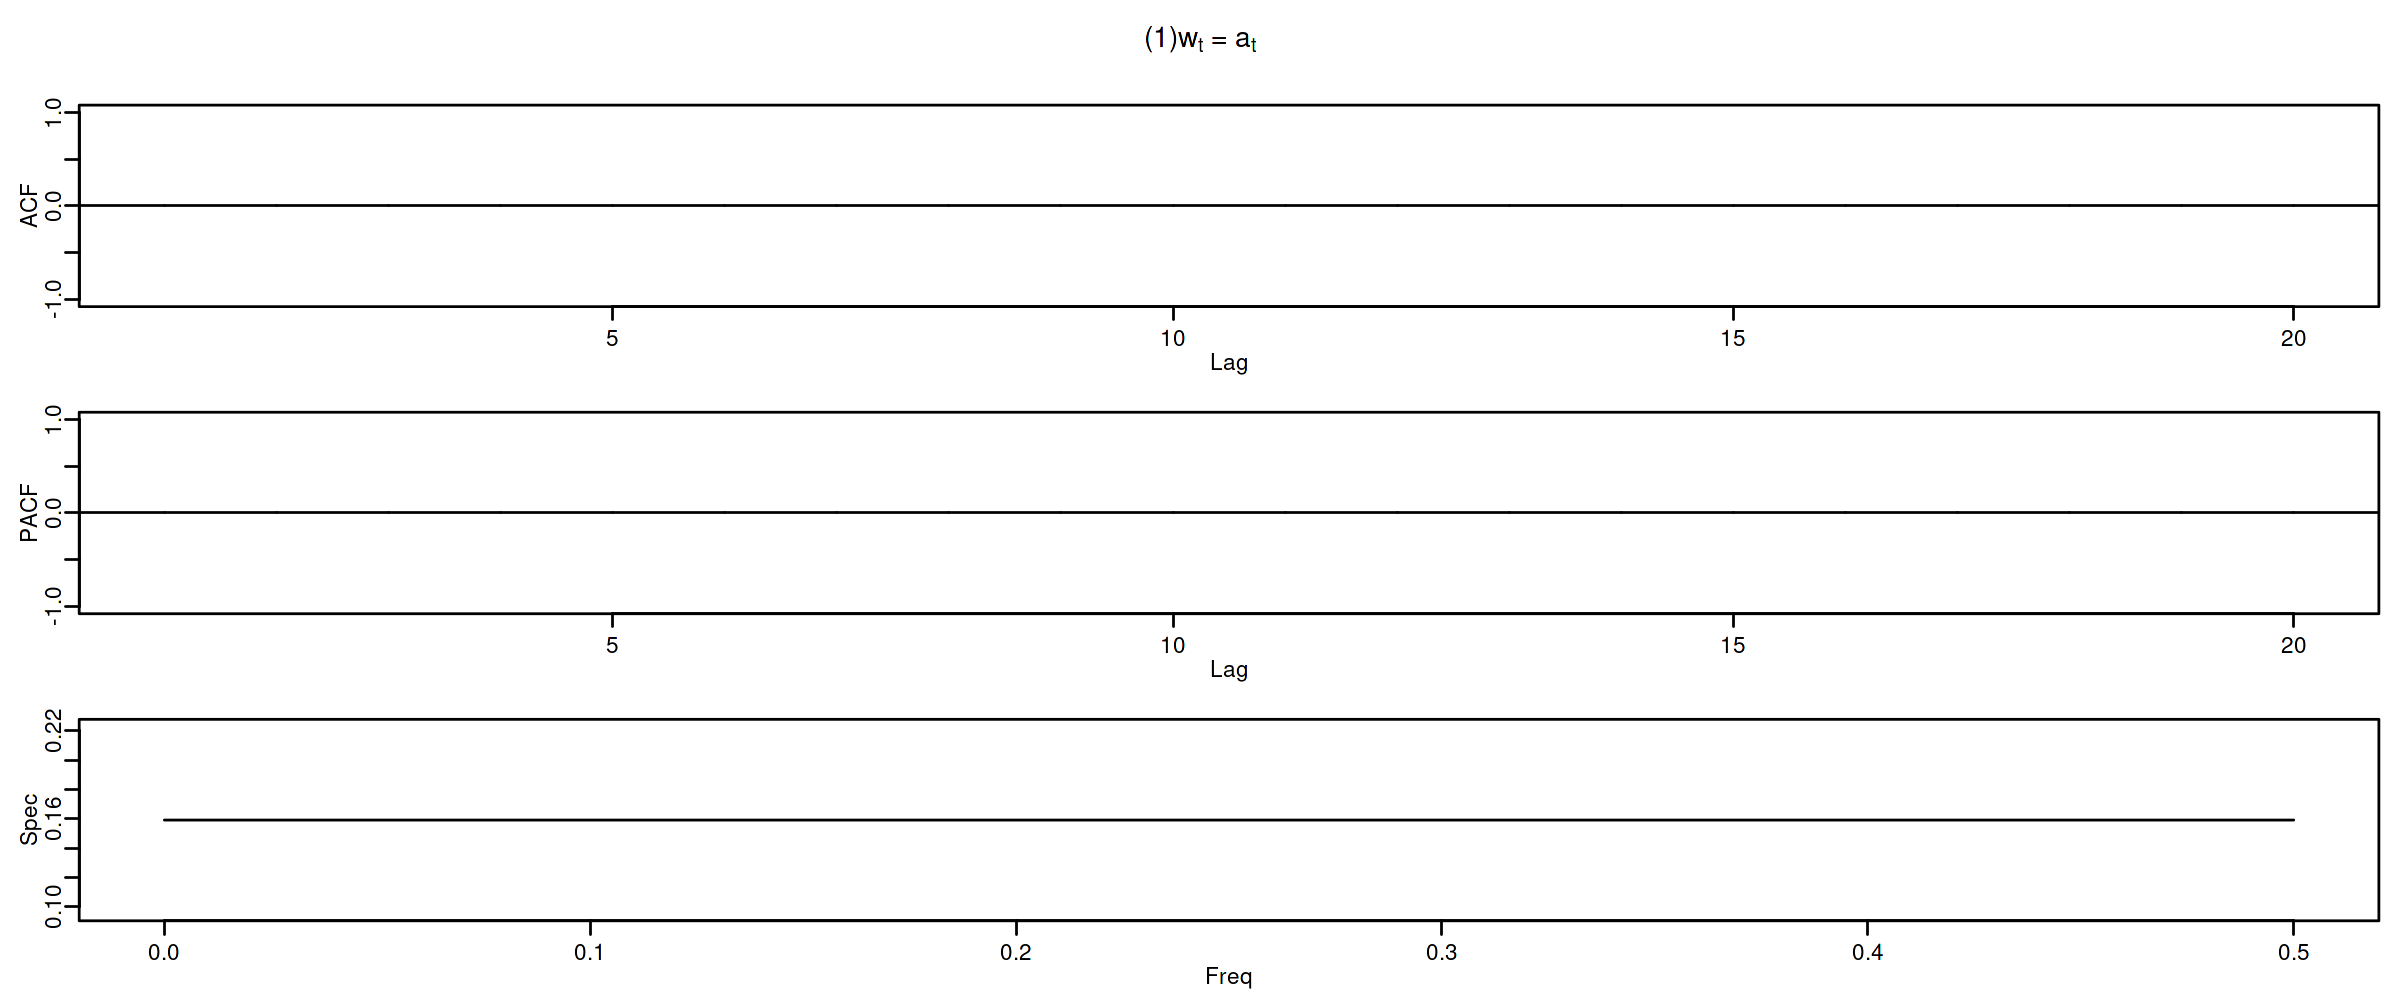

In [1]:
ar0p <- um(ar = "(1 - 0B)")
ar1p <- um(ar = "(1 - 0.9B)")
ar1n <- um(ar = "(1 + 0.9B)")
ma1p <- um(ma = "(1 - 0.9B)")
ma1n <- um(ma = "(1 + 0.9B)")
ar2c <- um(ar = "(1 - 1.52B + 0.8B^2)")
#display(list(ar1p, ar1n, ma1p, ma1n, ar2c), lag.max = 20)
display(list(ar0p), lag.max = 20)